In [22]:
# Discretization using K-means clustering

# A discretization transform will map numerical variables onto discrete values.

# We will use the sonar dataset.
# It involves 60 real-valued inputs and a two-class target variable. 
# There are 208 examples in the dataset and the classes are reasonably balanced.
# The dataset describes radar returns of rocks or simulated mines.

# Dataset description: 
# Each example in the dataset is a set of 60 numbers (features) in the range 0.0 to 1.0.  
# Each number (feature) represents the energy within a particular frequency band, integrated over
# a certain period of time.  The integration aperture for higher frequencies
# occur later in time, since these frequencies are transmitted later during the chirp.
# The label associated with each record contains the letter "R" if the object is a rock and 
# "M" if it is a mine (metal cylinder).


In [23]:
# Load and summarize the dataset

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,20)

# Load dataset
datafile = "./data/sonar.csv"
dataset = read_csv(datafile, header=None)

# Shape of the dataset
print(dataset.shape)

# View a few rows
dataset.head()


(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [24]:
# summarize each attribute
print(dataset.describe())


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

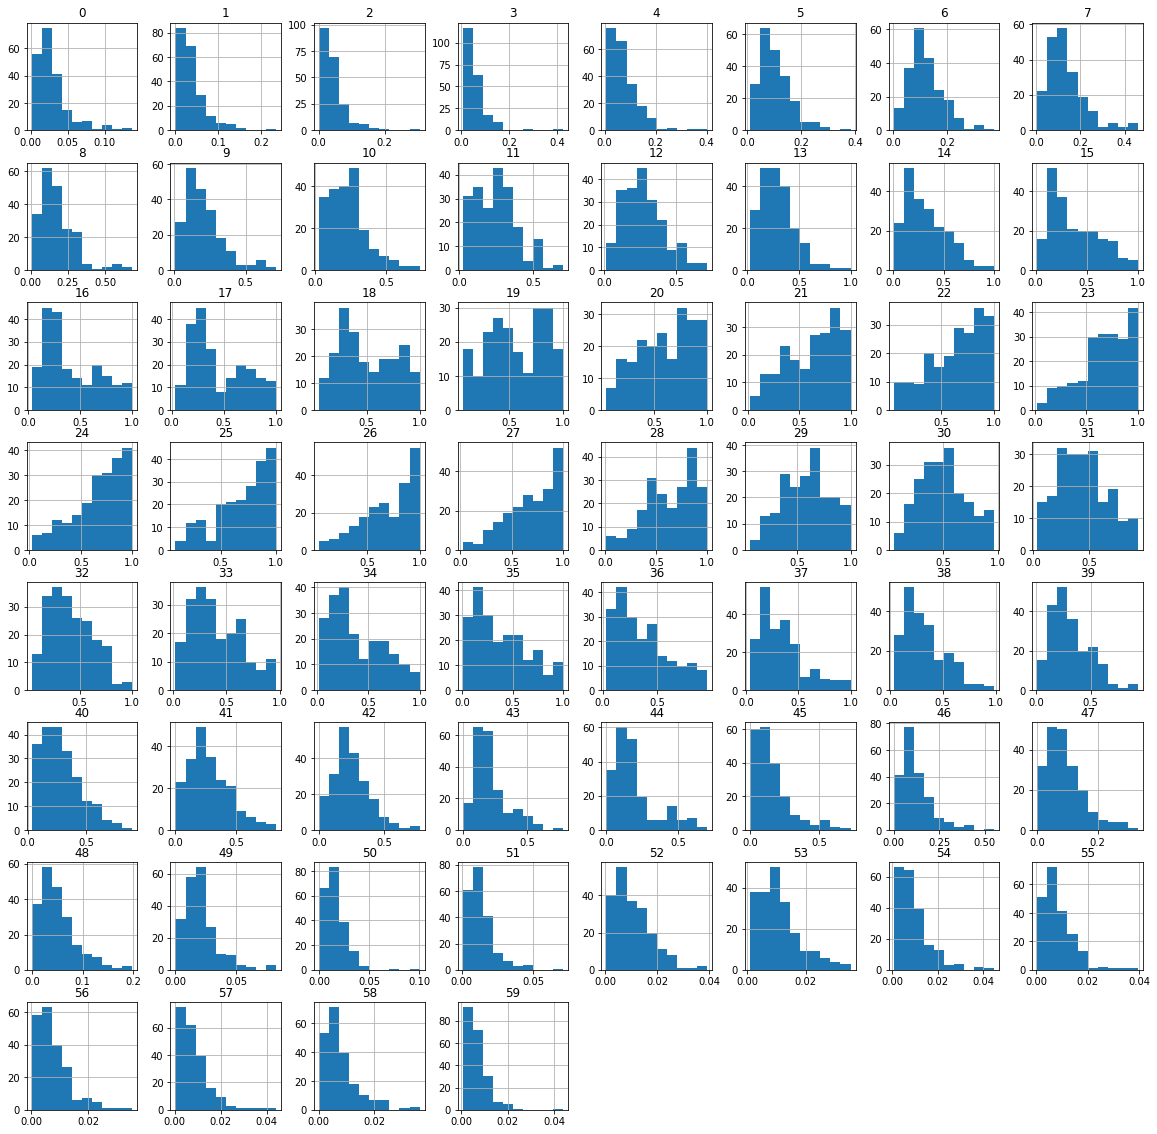

In [25]:
# histograms of the attributes
dataset.hist()
pyplot.show()

In [26]:
# Comment: Many variables have a skewed distribution.

In [27]:
# Let's fit and evaluate a machine learning model first

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [10]:
# Does discretization help the algorithm in this setting?
# Let's see...

In [28]:
# Perform discretization using the k-means clustering algorithm

# A K-means discretization will attempt to fit k clusters for each input variable 
# and then assign each observation to a cluster.
# The number of clusters should be small (e.g. 3), unless the empirical distribution of the variables is complex

from sklearn.preprocessing import KBinsDiscretizer
from pandas import DataFrame

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform k-means discretization (number of clusters = 3)
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data_t = trans.fit_transform(data)

# convert the array back to a dataframe
dataset_t = DataFrame(data_t)

# Show of a few rows of the transformed dataset
dataset_t.head()




,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


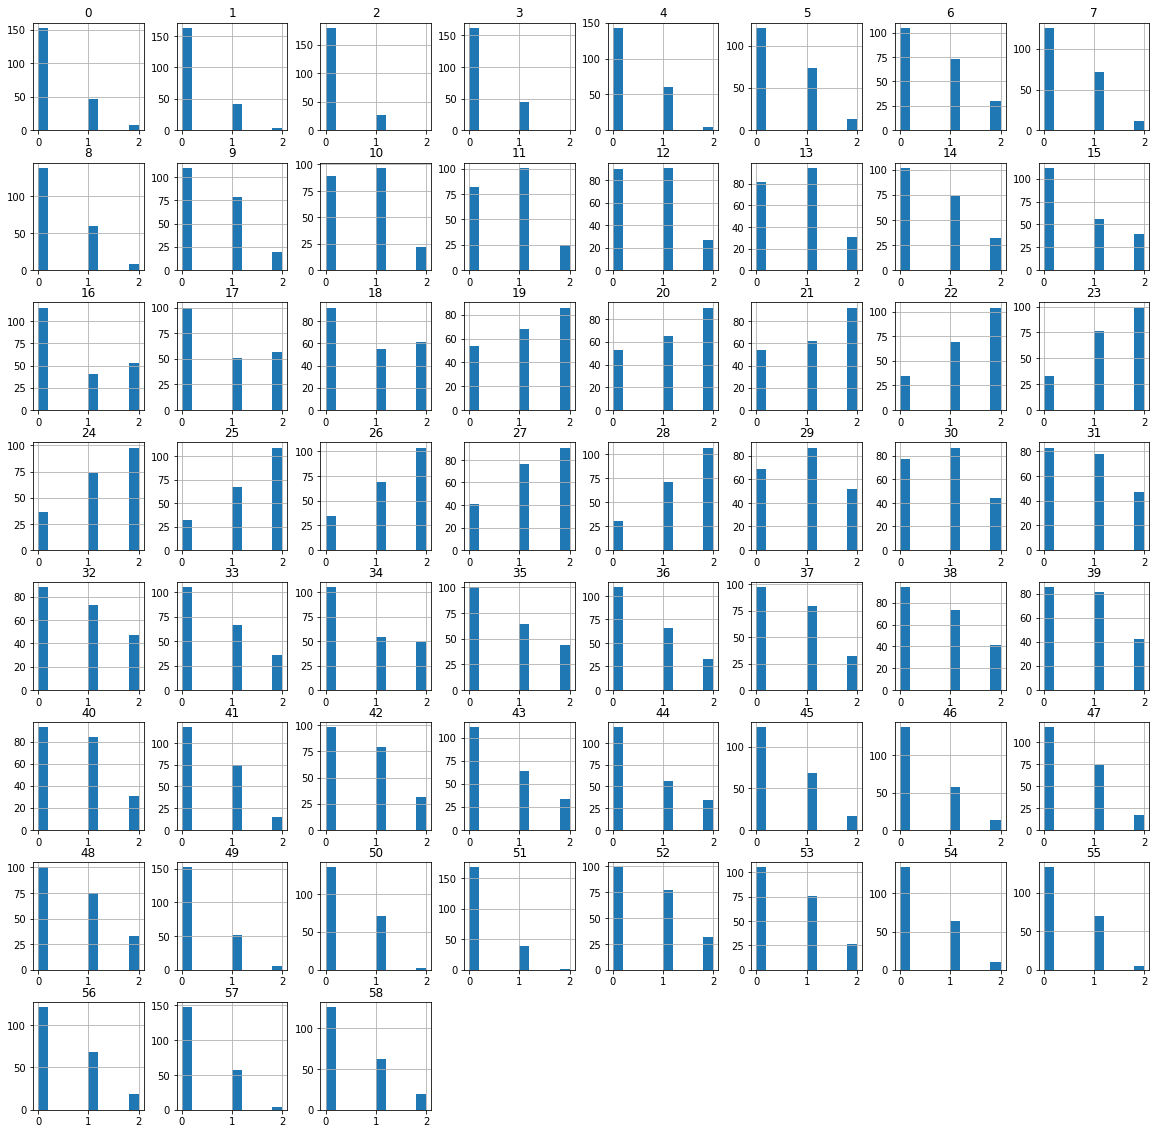

In [13]:
# histograms of the attributes
dataset.hist()
pyplot.show()

In [29]:
# Comment: The observations for each input variable are organized into one of three groups

In [30]:
# Let's evaluate the same algorithm on the transformed dataset
# (all needed code here again)

from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('./data/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.088)


In [31]:
# Comment: increased performance